In [18]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

import info_measures.numpy.kraskov_stoegbauer_grassberger as ksg

In [19]:
variance = 1.
rho = .6
n_samples = 1000
cs = {'knn1': '#9467bd',
      'knn2': '#8c564b',
      'true': '#1f77b4'}

In [48]:
dims = np.linspace(1, 40, 15, dtype=int)[::-1]

n_repeat = 100
e_ts = np.zeros((n_repeat, dims.size))
e_2ts = np.zeros((n_repeat, dims.size))
pis = np.zeros((n_repeat, dims.size))
e_pi1s = np.zeros((n_repeat, dims.size))
e_pi2s = np.zeros((n_repeat, dims.size))

for ii in range(n_repeat):
    dim = dims[0]
    sigma_2t = np.ones((2*dim, 2*dim)) * variance * rho
    sigma_2t[np.arange(2*dim), np.arange(2*dim)] = variance
    mean_2t = np.zeros(2*dim)
    samples = np.random.multivariate_normal(mean_2t, sigma_2t, size=n_samples)
    samples_x = samples[:, :dim]
    samples_y = samples[:, dim:]
    for jj, dim in enumerate(dims):
        sxi = samples_x[:, :dim]
        syi = samples_y[:, :dim]
        sigma_t = np.ones((dim, dim)) * variance * rho
        sigma_t[np.arange(dim), np.arange(dim)] = variance
        mean_t = np.zeros(dim)

        sigma_2t = np.ones((2*dim, 2*dim)) * variance * rho
        sigma_2t[np.arange(2*dim), np.arange(2*dim)] = variance
        mean_2t = np.zeros(2*dim)

        e_t = multivariate_normal(mean_t, sigma_t).entropy()
        e_2t = multivariate_normal(mean_2t, sigma_2t).entropy()
        e_ts[ii, jj] = e_t
        e_2ts[ii, jj] = e_2t
        pis[ii, jj] = pi(dim, variance, rho)
        e_ksg = ksg.MutualInformation(sxi, syi)
        e_pi1s[ii, jj] = e_ksg.mutual_information()
        e_pi2s[ii, jj] = e_ksg.mutual_information(kind=2)

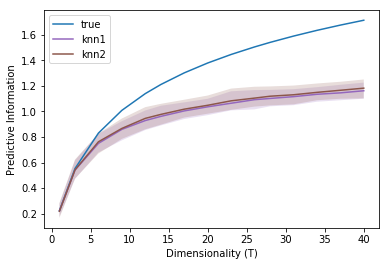

In [51]:
for x, name in zip([pis, e_pi1s, e_pi2s], ['true', 'knn1', 'knn2']):
    plt.plot(dims, np.median(x, axis=0), label=name, c=cs[name])
    if name != 'true':
        plt.fill_between(dims, np.percentile(x, 2.5, axis=0), np.percentile(x, 97.5, axis=0),
                         facecolor=cs[name], alpha=.2)
plt.legend()
plt.ylabel('Predictive Information')
plt.xlabel('Dimensionality (T)')
plt.savefig('/home/jesse/Downloads/pi_dim.pdf')
plt.show()

In [34]:
e_pi1s

array([[ 1.01390344,  0.99489527,  0.99095964, ...,  0.50321662,
         0.39985261,  0.22986748],
       [ 0.25367702,  0.25367702,  0.25367702, ...,  0.25367702,
         0.25367702,  0.25367702],
       [ 0.16231218,  0.16231218,  0.16231218, ...,  0.16231218,
         0.16231218,  0.16231218],
       ..., 
       [ 0.20574426,  0.20574426,  0.20574426, ...,  0.20574426,
         0.20574426,  0.20574426],
       [ 0.24005578,  0.24005578,  0.24005578, ...,  0.24005578,
         0.24005578,  0.24005578],
       [ 0.23683254,  0.23683254,  0.23683254, ...,  0.23683254,
         0.23683254,  0.23683254]])

In [60]:
dim = 6
variance = .64
rho = .6
sigma_t = np.ones((dim, dim)) * variance * rho
sigma_t[np.arange(dim), np.arange(dim)] = variance

In [61]:
variance*(1.+(dim-1)*rho), np.linalg.eigvalsh(sigma_t)

(2.56, array([ 0.256,  0.256,  0.256,  0.256,  0.256,  2.56 ]))

In [62]:
sigma_t

array([[ 0.64 ,  0.384,  0.384,  0.384,  0.384,  0.384],
       [ 0.384,  0.64 ,  0.384,  0.384,  0.384,  0.384],
       [ 0.384,  0.384,  0.64 ,  0.384,  0.384,  0.384],
       [ 0.384,  0.384,  0.384,  0.64 ,  0.384,  0.384],
       [ 0.384,  0.384,  0.384,  0.384,  0.64 ,  0.384],
       [ 0.384,  0.384,  0.384,  0.384,  0.384,  0.64 ]])

In [63]:
L = np.linalg.cholesky(sigma_t)
print(L)

[[ 0.8         0.          0.          0.          0.          0.        ]
 [ 0.48        0.64        0.          0.          0.          0.        ]
 [ 0.48        0.24        0.59329588  0.          0.          0.        ]
 [ 0.48        0.24        0.16180797  0.57080485  0.          0.        ]
 [ 0.48        0.24        0.16180797  0.12231533  0.55754564  0.        ]
 [ 0.48        0.24        0.16180797  0.12231533  0.09839041  0.54879547]]


In [64]:
print(L.T)

[[ 0.8         0.48        0.48        0.48        0.48        0.48      ]
 [ 0.          0.64        0.24        0.24        0.24        0.24      ]
 [ 0.          0.          0.59329588  0.16180797  0.16180797  0.16180797]
 [ 0.          0.          0.          0.57080485  0.12231533  0.12231533]
 [ 0.          0.          0.          0.          0.55754564  0.09839041]
 [ 0.          0.          0.          0.          0.          0.54879547]]


In [29]:
L.dot(L.T)

array([[ 1. ,  0.6,  0.6,  0.6],
       [ 0.6,  1. ,  0.6,  0.6],
       [ 0.6,  0.6,  1. ,  0.6],
       [ 0.6,  0.6,  0.6,  1. ]])

In [58]:
np.square(L[1]).sum()

1.0

In [39]:
def entropy(dim, variance, rho):
    e0 = variance*(1.+(dim-1.)*rho)
    return .5*np.log(e0 * np.power(variance*(1.-rho), dim-1)*(2.*np.pi*np.e)**dim)

def pi(dim, variance, rho):
    num = variance*(1.+(dim-1.)*rho)
    den = variance*(1.+(2*dim-1.)*rho)
    return np.log(num / np.sqrt(den)) -.5*np.log(variance*(1.-rho))

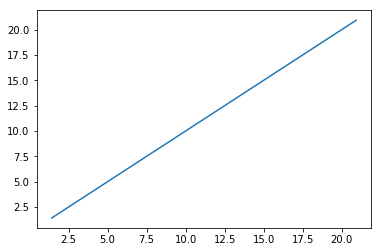

In [15]:
plt.plot(entropy(dims, variance, rho), e_ts)
plt.show()